In [1]:
%matplotlib inline

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Buy or Rent a house?
The article was developed by **Daniel Yordanov** <br>
Softuni Username: **dakataebg**

### Contents:

1. [Introduction](#introduction)
2. [Reading rents dataset](#reading-rents-dataset)
    1. [Clean rents data](#clean-rents-data)
3. [Reading apartments dataset](#reading-apartments-dataset)
    1. [Clean apartments data](#clean-apartments-data)
4. [Display distribution](#display-distribution)
5. [Unite both tables](#unite-both-tables)
    1. [Take only mutual](#take-only-mutual)
6. [Analysis](#analysis)
7. [Conclusion](#conclusion)


## Introduction <a id="introduction" />
Probably an appropriate question for every person who wants to live in a new city for a long time. <br> 
Personally, I was asking myself this question when deciding where to live when I go to Sofia to learn at university. <br>
Ok, so how will we decide which one is financially better?

We will analyse the prices of apartments and compare their rental value in Sofia. <br>
We are going to use two datasets scraped from "imot.bg" on 21.07.2022.

## Reading rents dataset <a id="reading-rents-dataset" />

In [3]:
rents_data = pd.read_csv("data/rents-2022-07-21.csv")
rents_data.columns = ["url", "floor", "district", "type", "price"]
rents_data.head()

,url,floor,district,type,price
0,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=2b...,8,Борово,1-СТАЕН,520 лв.
1,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=2b...,12,Връбница 2,1-СТАЕН,250 EUR
2,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=2b...,2,Лозенец,1-СТАЕН,210 EUR
3,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=2b...,4,"Лозенец, ул. Милин камък",1-СТАЕН,260 EUR
4,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=2b...,5,Люлин 2,1-СТАЕН,570 лв.


## Clean rents data <a id="clean-rents-data" />

#### Remove URL attribute
We **don't need rents URL**, so we will remove it.

In [4]:
rents_data = rents_data.drop(columns=["url"])
rents_data.head()

,floor,district,type,price
0,8,Борово,1-СТАЕН,520 лв.
1,12,Връбница 2,1-СТАЕН,250 EUR
2,2,Лозенец,1-СТАЕН,210 EUR
3,4,"Лозенец, ул. Милин камък",1-СТАЕН,260 EUR
4,5,Люлин 2,1-СТАЕН,570 лв.


#### Clean price

First, we will **remove spaces**.

In [5]:
rents_data.price = rents_data.price.str.replace(" ", "", regex=False)
rents_data.head()

,floor,district,type,price
0,8,Борово,1-СТАЕН,520лв.
1,12,Връбница 2,1-СТАЕН,250EUR
2,2,Лозенец,1-СТАЕН,210EUR
3,4,"Лозенец, ул. Милин камък",1-СТАЕН,260EUR
4,5,Люлин 2,1-СТАЕН,570лв.


We can see that price is in lev or EUR. We want it only in **EUR**.

In [6]:
lv_text = "лв."
lv_to_eur_course = 0.51
rents_in_lv = rents_data[rents_data.price.str.contains(lv_text)].price
rents_in_lv = rents_in_lv.str.replace(lv_text, "", regex=False).astype(float) * lv_to_eur_course
                                      
rents_data.price.update(rents_in_lv)
rents_data.head()

,floor,district,type,price
0,8,Борово,1-СТАЕН,265.2
1,12,Връбница 2,1-СТАЕН,250EUR
2,2,Лозенец,1-СТАЕН,210EUR
3,4,"Лозенец, ул. Милин камък",1-СТАЕН,260EUR
4,5,Люлин 2,1-СТАЕН,290.7


Now that all prices are in EUR we have to **remove the EUR text** and **parse them** to float.

In [7]:
eur_text = "EUR"
fixed_prices = rents_data.price.str.replace(eur_text, "", regex=False).astype(float)

rents_data.price.update(fixed_prices)
rents_data.head()

,floor,district,type,price
0,8,Борово,1-СТАЕН,265.2
1,12,Връбница 2,1-СТАЕН,250.0
2,2,Лозенец,1-СТАЕН,210.0
3,4,"Лозенец, ул. Милин камък",1-СТАЕН,260.0
4,5,Люлин 2,1-СТАЕН,290.7


#### Remove streets from districts
Some districts contain streets, but we don't need them.

In [8]:
street_regex = r", .*"
fixed_districts = rents_data.district.replace(street_regex, "", regex=True)

rents_data.district.update(fixed_districts)
rents_data.head()

,floor,district,type,price
0,8,Борово,1-СТАЕН,265.2
1,12,Връбница 2,1-СТАЕН,250.0
2,2,Лозенец,1-СТАЕН,210.0
3,4,Лозенец,1-СТАЕН,260.0
4,5,Люлин 2,1-СТАЕН,290.7


## Reading apartments dataset <a id="reading-apartments-dataset" />

In [9]:
apartments_data = pd.read_csv("data/apartments-2022-07-21.csv")
apartments_data.columns = ["url", "floor", "district", "type", "price"]
apartments_data.head()

,url,floor,district,type,price
0,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=1a...,4,Център,1-СТАЕН,138000
1,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=1b...,6,"Банишора, ул. Шумен",2-СТАЕН,97300
2,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=1b...,3,Банишора,2-СТАЕН,110000
3,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=1b...,5,Банишора,2-СТАЕН,117990
4,https://www.imot.bg/pcgi/imot.cgi?act=5&adv=1b...,3,Банишора,2-СТАЕН,132000


## Clean apartments data <a id="clean-apartments-data" />

#### Remove URL attribute
We **don't need apartments URL**, so we will remove it.

In [10]:
apartments_data = apartments_data.drop(columns=["url"])
apartments_data.head()

,floor,district,type,price
0,4,Център,1-СТАЕН,138000
1,6,"Банишора, ул. Шумен",2-СТАЕН,97300
2,3,Банишора,2-СТАЕН,110000
3,5,Банишора,2-СТАЕН,117990
4,3,Банишора,2-СТАЕН,132000


#### Parse price

In [11]:
apartments_data.price = apartments_data.price.astype(int)
apartments_data.dtypes.price

dtype('int32')

#### Remove streets from districts
Some districts contain streets, but we don't need them.

In [12]:
fixed_districts = apartments_data.district.replace(street_regex, "", regex=True)

apartments_data.district.update(fixed_districts)
apartments_data.head()

,floor,district,type,price
0,4,Център,1-СТАЕН,138000
1,6,Банишора,2-СТАЕН,97300
2,3,Банишора,2-СТАЕН,110000
3,5,Банишора,2-СТАЕН,117990
4,3,Банишора,2-СТАЕН,132000


## Display distribution <a id="display-distribution" />
Now we are going to visualize how all rent and apartment ad observations are distributed by district.

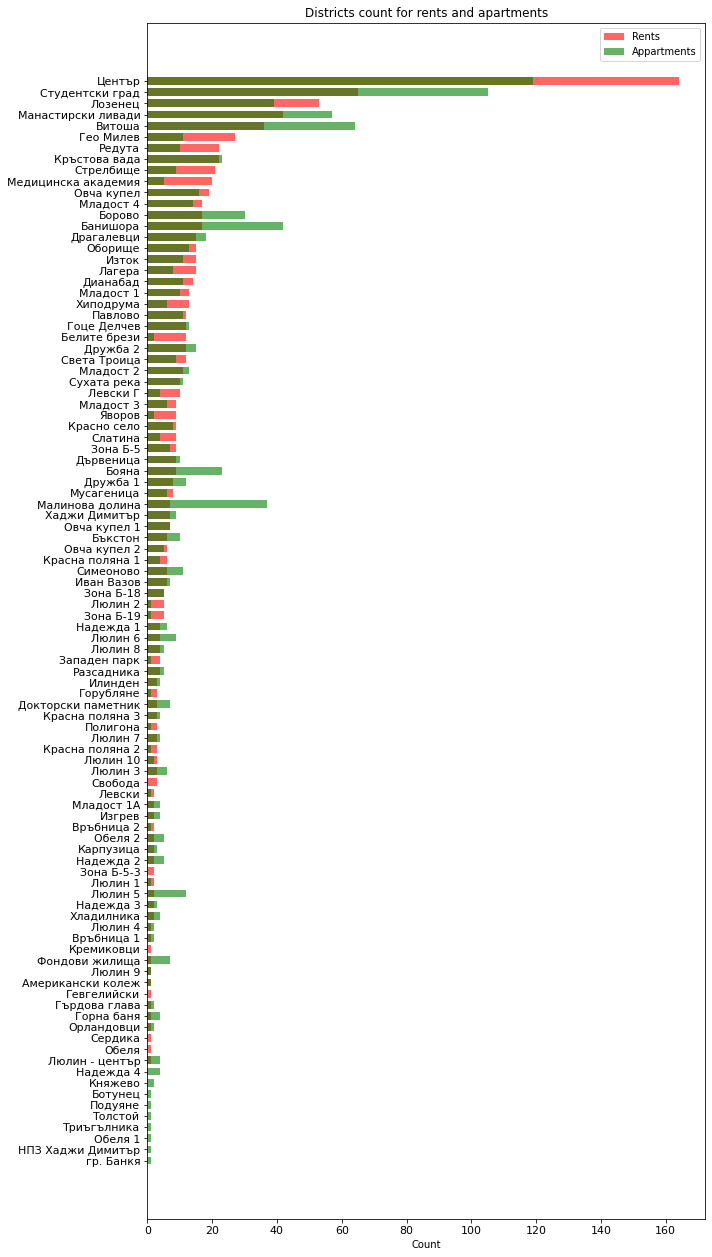

In [13]:
rents_by_districts_count = rents_data.district.value_counts()
apartments_by_districts_count = apartments_data.district.value_counts()

fig, ax = plt.subplots(figsize=(10,22))
ax.invert_yaxis()
ax.tick_params(axis="both", which="major", labelsize=11)

ax.set_xlabel("Count")
ax.set_title("Districts count for rents and apartments")

alpha = 0.6
height = 0.7
ax.barh(
    rents_by_districts_count.index,
    rents_by_districts_count.values,
    alpha=alpha,
    height=height,
    color="r",
    label="Rents"
)
ax.barh(
    apartments_by_districts_count.index,
    apartments_by_districts_count.values, 
    alpha=alpha, 
    height=height,
    color="g",
    label="Appartments"
)

plt.legend()
plt.show()

## Unite both tables <a id="unite-both-tables" />

In [14]:
avg_rents = rents_data.groupby(["district", "floor", "type"]).agg('price').mean()
avg_apartments_price = apartments_data.groupby(["district", "floor", "type"]).agg('price').mean()

real_estate_data = pd.concat([avg_rents,avg_apartments_price],axis=1)
real_estate_data.columns = ["rent", "price"]
real_estate_data

rent          price
district          floor type                         
Американски колеж 2     3-СТАЕН  900.0            NaN
Банишора          1     2-СТАЕН  332.6  155425.000000
                  2     2-СТАЕН  357.0  135133.333333
                  3     2-СТАЕН  377.4  130888.888889
                        3-СТАЕН  500.0            NaN
...                                ...            ...
Хладилника        5     3-СТАЕН    NaN  270000.000000
                  6     2-СТАЕН    NaN  179000.000000
Център            7     1-СТАЕН    NaN   86500.000000
Яворов            5     3-СТАЕН    NaN  299900.000000
гр. Банкя         2     3-СТАЕН    NaN  199000.000000

[871 rows x 2 columns]

#### Take only mutual <a id="take-only-mutual" />
We want all records from rents and apartments to have some pair in the other set with equal district floor and type.  

In [15]:
real_estate_data = real_estate_data.dropna(subset=['rent','price'])
real_estate_data

rent          price
district floor type                         
Банишора 1     2-СТАЕН  332.6  155425.000000
         2     2-СТАЕН  357.0  135133.333333
         3     2-СТАЕН  377.4  130888.888889
         4     2-СТАЕН  365.5   90000.000000
         5     2-СТАЕН  299.0  116492.500000
...                       ...            ...
Център   6     3-СТАЕН  746.0  241450.000000
               4-СТАЕН  751.9  289100.000000
         7     2-СТАЕН  382.5  203000.000000
               3-СТАЕН  449.0  310000.000000
Яворов   3     3-СТАЕН  647.5  249000.000000

[188 rows x 2 columns]

## Analysis of prices to rents ratio <a id="analysis" />
#### How long do you have to stay to pay the price of apartment in kind of rent?

Min: 9 years
Mean: 31 years
Max: 63 years


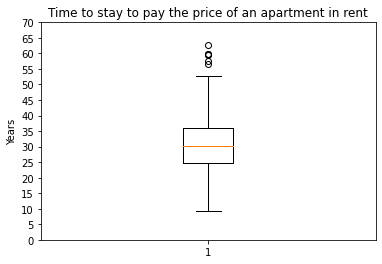

In [16]:
def print_years_data(text, years):
    print(text, round(years), "years")

months_needed_to_be_paid = (real_estate_data.price / real_estate_data.rent).values / 12

print_years_data("Min:", months_needed_to_be_paid.min())
print_years_data("Mean:", months_needed_to_be_paid.mean())
print_years_data("Max:", months_needed_to_be_paid.max())

plt.boxplot(months_needed_to_be_paid)

plt.title("Time to stay to pay the price of an apartment in rent")
plt.ylabel("Years")
plt.yticks(np.arange(0, months_needed_to_be_paid.max() + 10, 5))
plt.show()

## Conclusion: <a id="conclusion" />

In the end, if you are willing to stay for **less than 10 years** in Sofia, probably you should **rent an apartment**, and if you plan to stay for longer, you should consider a way to **buy an apartment**.

#### References: 
* [Data Source](https://www.imot.bg/)